# Импорты

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 17.1 MB/s eta 0:00:00


In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=a9f85358b9d6d088ced09fcdac3a2aa2baff0cc6d9b47e65e575b3f21d5d6497
  Stored in directory: /root/.cache/pip/wheels/da/d8/66/395317506a23a9d1d7de433ad6a7d9e6e16aab48cf028a0f60
Successfully built stop-words


In [ ]:
!pip install tqdm boto3 requests regex sentencepiece sacremoses # for Bert tokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.1/135.1 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 60.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 5.5 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=6e28741ff57d69cd4c09168341423ed6e0a99404fbaeca98556a5f71d475f358
  Stored in directory: /root/.cache/pip/wheels/12/1c/3d/46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import torch
import string
import json

from stop_words import get_stop_words
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
stop_words.extend(nltk_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Чтение датасета

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# posts = []
# for line in open("/content/drive/MyDrive/ds_case_vk/ranking_train.jsonl", 'r'):
#     posts.append(json.loads(line))
    
# all_comments = []
# for i in range(len(posts)):
#     all_comments.append(pd.DataFrame.from_dict(posts[i], orient='columns'))
    
# df_train = pd.concat(all_comments, ignore_index=True)


posts = []
for line in open("ranking_train.jsonl", 'r'):
    posts.append(json.loads(line))
    
all_comments = []
for i in range(len(posts)):
    all_comments.append(pd.DataFrame.from_dict(posts[i], orient='columns'))
    
df_train = pd.concat(all_comments, ignore_index=True)

In [ ]:
df_train['score'] = df_train['comments'].map(lambda a: a['score'])
df_train['comments'] = df_train['comments'].map(lambda a: a['text'])

In [ ]:
df_train.sample(10)

,text,comments,score
80396,Books Programmers Don't Really Read,Couldn't disagree more about TAOCP. I haven't ...,1
318563,US surveillance revelations deepen European fears,"&gt; Europe, which lacks internet giants of it...",3
171374,535 ways to reload the page with JavaScript,Is there any way which doesn't break the back ...,4
359615,The Big Data Brain Drain: Why Science is in Tr...,This is so true. I&#x27;m in a Ph.D. program a...,0
135737,Zynga Raising $500 Million at $10 Billion Valu...,Is zynga making more money than facebook?,2
298887,API Company Mistakes - Serialization Formats,What kind of language and library makes creati...,2
28969,Tokyo Cabinet DB: Beyond Key-Value Store,"Haven't used it, but Erlang bindings: http://d...",4
64377,Ask HN: How to apply for positions that requir...,"Well, if Lockheed's in the US, they you better...",2
352613,Square Cash,The most stunning part of this is the &quot;fr...,3
390085,"Cryptanalys.is – Hacker News for crypto, secur...",&gt; Passwords can only consist of the followi...,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440535 entries, 0 to 440534
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      440535 non-null  object
 1   comments  440535 non-null  object
 2   score     440535 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.1+ MB


# Предобработка

Подготовим данные для модели.

In [ ]:
def clear_text(x):
  x = x.lower() #Нижний регистр
  x = re.sub(r'http\S+', ' ', x) #Удаление ссылок
  x = re.sub("[^a-zA-Z']+", ' ', x) #Удаление символов не из латиницы (в т.ч. пунктуации, кроме апотсрофов)
  x = x.strip() #Лишние пробелы
  return x

In [ ]:
df_train['comments_cleaned'] = df_train['comments'].apply(lambda x: clear_text(x))

Удаление стоп-слов:

In [ ]:
df_train['comments_cleaned'] = df_train['comments_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

Сравним тексты до и после предобработки:

In [ ]:
df_train[['comments', 'score', 'comments_cleaned']].sample(n=7, random_state=42)

,comments,score,comments_cleaned
215313,So much drama around what is basically a skin/...,3,much drama around basically skin cosmetic impr...
87434,Hmm.If you're going to sell your work for free...,4,hmm going sell work free well imo making marke...
406662,The main bottleneck in WebKit was Object.proto...,2,main bottleneck webkit object prototype hasown...
274636,It seems like this article could use explanati...,1,seems like article use explanation seems many ...
201259,I quite like it. I don't think it's too bad as...,4,quite like think bad standalone site compared ...
232437,You should absolutely spend a day or two worki...,2,absolutely spend day two working multi dimensi...
30862,I never had a chance to try linode–I've been s...,2,never chance try linode pleased slicehost sinc...


Из-за вычислительных ограничений обрежем длинные комментарии до двухсот слов:

In [ ]:
limit = 200
df_train_subset = df_train[['score', 'comments_cleaned']].copy()
df_train_subset['comments_cleaned'] = df_train_subset['comments_cleaned'].apply(lambda x: ' '.join(x.split()[:limit]))

# Модели

Итак, наша гипотеза заключается в том, что на популярность комментария могут влиять признаки, связанные с анализом тональности текста. Для их генерации будем используем следующие модели (на фреймворке PyTorch):


1.   toxic-bert, которая выделяет признаки **['toxic', 'insult', 'obscene', 'threat', 'identity_hate']**. На выходе получаем вероятности отнесения к этим классам (https://huggingface.co/unitary/toxic-bert).
2.   distilbert-base-uncased, классифицирущая текст на 2 класса — **'positive' и 'negative'**. На выходе так же получаем вероятности (https://huggingface.co/distilbert-base-uncased).



## toxic-bert

In [ ]:
from transformers import AutoTokenizer

In [ ]:
from os.path import exists
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

In [ ]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [ ]:
DEVICE = torch.device("cuda")

Импортируем обученный токенизатор и модель:

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('unitary/toxic-bert')
model = torch.hub.load('unitaryai/detoxify','toxic_bert').to(DEVICE)

/usr/local/lib/python3.9/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/unitaryai/detoxify/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.1-alpha/toxic_original-c1212f89.ckpt" to /root/.cache/torch/hub/checkpoints/toxic_original-c1212f89.ckpt


  0%|          | 0.00/418M [00:00<?, ?B/s]

Будем использовать эмбеддинги признаков. Так как у модели ограничение на количество токенов, векторизуем текст по частям в 510 токенов, частичные предсказания будем усреднять:

In [ ]:
def run_model(txt):
  tokens = tokenizer.encode_plus(
      txt, add_special_tokens=False,
      max_length=510, truncation=True,
      padding="max_length",
      return_tensors='pt'
  )
  tokens = tokens.to(DEVICE)
  input_id_chunks = tokens['input_ids'][0].to(DEVICE).split(510)
  mask_chunks = tokens['attention_mask'][0].to(DEVICE).split(510)

  for i in range(len(input_id_chunks)):
    pad_len = 512 - input_id_chunks[i].shape[0]
    if pad_len > 0:
        input_id_chunks, mask_chunks = list(input_id_chunks), list(mask_chunks)
        input_id_chunks[i] = torch.cat([
            input_id_chunks[i], torch.Tensor([0] * pad_len).to(DEVICE)
        ]).to(DEVICE)
        mask_chunks[i] = torch.cat([
            mask_chunks[i], torch.Tensor([0] * pad_len).to(DEVICE)
        ]).to(DEVICE)

  input_ids = torch.stack(input_id_chunks).to(DEVICE)
  attention_mask = torch.stack(mask_chunks).to(DEVICE)

  input_dict = {
      'input_ids': input_ids.long(),
      'attention_mask': attention_mask.int()
  }
  model.to(DEVICE)
  outputs = model(**input_dict)

  probs = torch.nn.functional.softmax(outputs[0], dim=-1).cpu()
  probs = probs.mean(dim=0)
  probs = [elem.detach().item() for elem in probs]

  return probs


In [ ]:
df_tox_features = df_train_subset[['score', 'comments_cleaned']].copy()
probs = df_tox_features['comments_cleaned'].apply(lambda x: run_model(x)).values.tolist()

In [ ]:
new_features = ['toxic', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_hate']
df_new_features = pd.DataFrame(probs, columns = new_features)
df_new_features.drop('severe_toxicity', axis = 1, inplace = True)
df_new_features=df_new_features.loc[:, ['toxic', 'insult', 'obscene', 'threat', 'identity_hate']]
df_new_features.shape

(440535, 6)

Получили датасет с новыми признаками:

In [ ]:
df_new_features.head()

,toxic,insult,obscene,threat,identity_hate
0,0.875984,0.033556,0.071335,0.008999,0.006027
1,0.729593,0.034843,0.221688,0.005455,0.003379
2,0.727378,0.075560,0.090244,0.036523,0.042218
3,0.727750,0.076194,0.087342,0.035427,0.044606
4,0.835620,0.051326,0.059932,0.018480,0.022818


In [ ]:
df_new_features.to_csv('toxic_features2', sep=',')

### distilbert-base-uncased

Аналогичным образом запустим вторую модель.

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier

In [ ]:
df_pos_neg = df_train_subset[['score', 'comments_cleaned']].copy()
probs_pos_neg = df_pos_neg['comments_cleaned'].apply(lambda x: run_model(x)).values.tolist()

In [ ]:
features_list = ['positive', 'negative']
df_pos_neg = pd.DataFrame(probs_pos_neg, columns = features_list)
df_pos_neg.shape

(440535, 2)

In [ ]:
df_pos_neg.head()

,positive,negative
0,0.476387,0.523613
1,0.469201,0.530799
2,0.492584,0.507416
3,0.480932,0.519068
4,0.442132,0.557868


In [ ]:
df_pos_neg.to_csv('pos_neg_features', sep=',')

# Интерпретация результатов и проверка гипотез

In [ ]:
import seaborn as sns

Соберем полученные данные в один датасет:

In [ ]:
new_df = pd.concat([df_train[['comments', 'comments_cleaned', 'score']], df_new_features, df_pos_neg], axis=1)
new_df.drop('Unnamed: 0', axis=1, inplace = True)
new_df.head()

,comments,comments_cleaned,score,toxic,insult,obscene,threat,identity_hate,positive,negative
0,Going back to school is not identical with giv...,going back school identical giving founders go...,0,0.875984,0.033556,0.071335,0.008999,0.006027,0.476387,0.523613
1,There will invariably be those who don't see t...,invariably see success set fall back original ...,1,0.729593,0.034843,0.221688,0.005455,0.003379,0.469201,0.530799
2,For me school is a way to be connected to what...,school way connected going real world entered ...,2,0.727378,0.075560,0.090244,0.036523,0.042218,0.492584,0.507416
3,I guess it really depends on how hungry you ar...,guess really depends hungry much believe produ...,3,0.727750,0.076194,0.087342,0.035427,0.044606,0.480932,0.519068
4,I know pollground decided to go back to school...,know pollground decided go back school getting...,4,0.835620,0.051326,0.059932,0.018480,0.022818,0.442132,0.557868


Проверим результаты, которые нам выдала модель. Сгруппируем данные по популярности и посмотрим на среднее значение каждого признака:

In [ ]:
new_df[['score', 'toxic', 'insult', 'obscene', 'threat', 'identity_hate', 'positive', 'negative']]\
        .groupby('score', as_index=False).agg('mean')

,score,toxic,insult,obscene,threat,identity_hate,positive,negative
0,0,0.793864,0.048265,0.110070,0.017881,0.017329,0.482266,0.517734
1,1,0.797475,0.051492,0.098081,0.019254,0.019828,0.481176,0.518824
2,2,0.799074,0.052953,0.092555,0.019894,0.021077,0.480577,0.519423
3,3,0.801059,0.053454,0.089129,0.020133,0.021601,0.480127,0.519873
4,4,0.803877,0.053560,0.086118,0.020075,0.021791,0.479576,0.520424


Видим незначительную отрицательную корреляцию по признакам 'toxic', 'insult', 'identity_hate', 'negative'. То есть в среднем, чем больше значения этих признаков, тем меньше их рейтинг по популярности.

Визуализация:

In [ ]:
temp = new_df[['score', 'toxic', 'insult', 'identity_hate', 'negative']]\
        .groupby('score', as_index=False).agg('mean')

Text(0.5, 1.0, 'Negative mean values')

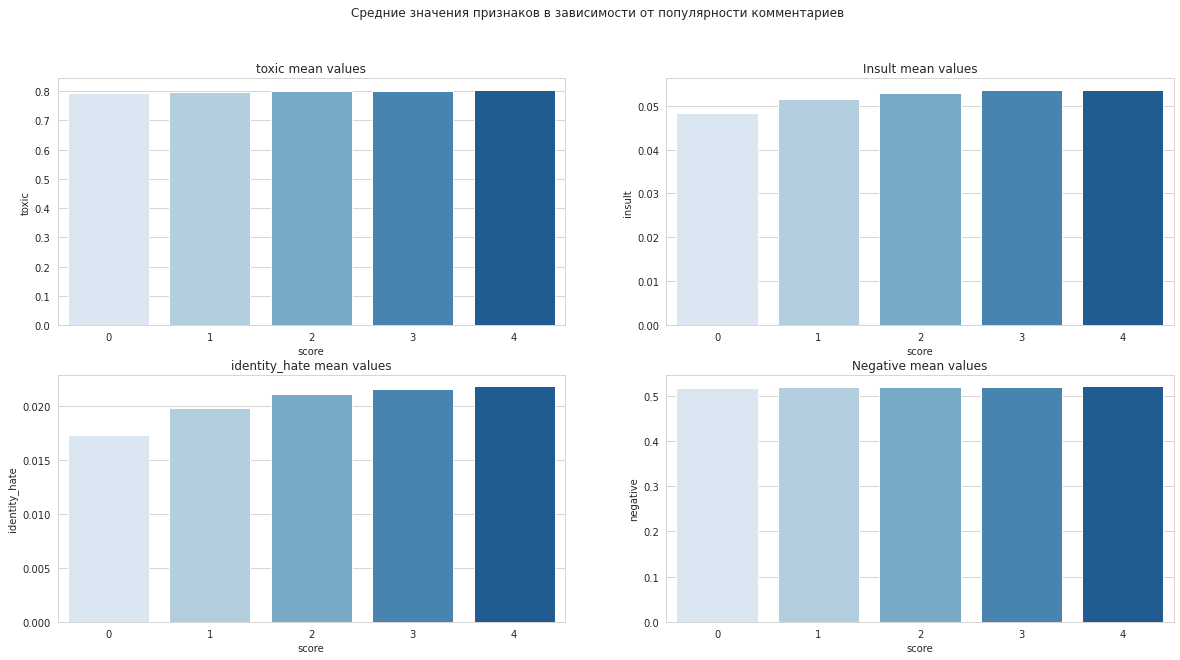

In [ ]:
sns.set_style("whitegrid")
sns.set_palette('Blues')

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Средние значения признаков в зависимости от популярности комментариев')

sns.barplot(ax = axes[0][0], data=temp[['toxic', 'score']], x='score', y="toxic", 
            palette='Blues').set_title('toxic mean values')
sns.barplot(ax = axes[0][1], data=temp[['insult', 'score']], x='score', y="insult", 
            palette='Blues').set_title('Insult mean values')
sns.barplot(ax = axes[1][0], data=temp[['identity_hate', 'score']], x='score', y="identity_hate", 
            palette='Blues').set_title('identity_hate mean values')
sns.barplot(ax = axes[1][1], data=temp[['negative', 'score']], x='score', y="negative", 
            palette='Blues').set_title('Negative mean values')

В целом, модель дает либо слишком "грубые" предсказания, поэтому модели не очень применимы к нашим данным:


In [ ]:
mask = new_df['toxic'].between(0.5, 1)
mask.value_counts()

True     438662
False      1873
Name: toxic, dtype: int64

In [ ]:
mask3 = new_df['obscene'].between(0.5, 1)
mask3.value_counts()

False    440241
True        294
Name: obscene, dtype: int64

In [ ]:
mask4 = new_df['threat'].between(0.5, 1)
mask4.value_counts()

False    440535
Name: threat, dtype: int64

In [ ]:
mask5 = new_df['identity_hate'].between(0.5, 1)
mask5.value_counts()

False    440535
Name: identity_hate, dtype: int64

In [ ]:
mask5 = new_df['positive'].between(0.5, 1)
mask5.value_counts()

False    419470
True      21065
Name: positive, dtype: int64

# Генерация признаков для тестового датасета

In [ ]:
posts = []
for line in open("ranking_test.jsonl", 'r'):
    posts.append(json.loads(line))
    
all_comments = []
for i in range(len(posts)):
    all_comments.append(pd.DataFrame.from_dict(posts[i], orient='columns'))
    
df_test = pd.concat(all_comments, ignore_index=True)

In [ ]:
df_test['score'] = df_test['comments'].map(lambda a: a['score'])
df_test['comments'] = df_test['comments'].map(lambda a: a['text'])

In [ ]:
df_test['comments_cleaned'] = df_test['comments'].apply(lambda x: clear_text(x))

In [ ]:
df_test['comments_cleaned'] = df_test['comments_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df_test[['comments', 'comments_cleaned']].sample(n=7, random_state=42)

In [ ]:
limit = 200
df_test_subset = df_test[['comments', 'comments_cleaned']].copy()
df_test_subset['comments_cleaned'] = df_test_subset['comments_cleaned'].apply(lambda x: ' '.join(x.split()[:limit]))

In [ ]:
df_pos_neg_test = df_test_subset[['comments', 'comments_cleaned']].copy()
probs_pos_neg_test= df_pos_neg_test['comments_cleaned'].apply(lambda x: run_model(x)).values.tolist()

In [ ]:
features_list = ['positive', 'negative']
df_new_test = pd.DataFrame(probs_pos_neg_test, columns = features_list)
df_new_test.shape

In [ ]:
df_new_test.to_csv('pos_neg_test_features', sep=',')